In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from lifelines.fitters.kaplan_meier_fitter import KaplanMeierFitter

In [3]:
preds = pd.read_csv("bayesian_preds.csv")
labels = preds["labels"].to_numpy()
probs = preds["preds"].to_numpy()

In [4]:
test_data = pd.read_csv("test.csv")

In [5]:
m = (probs > 0.5)

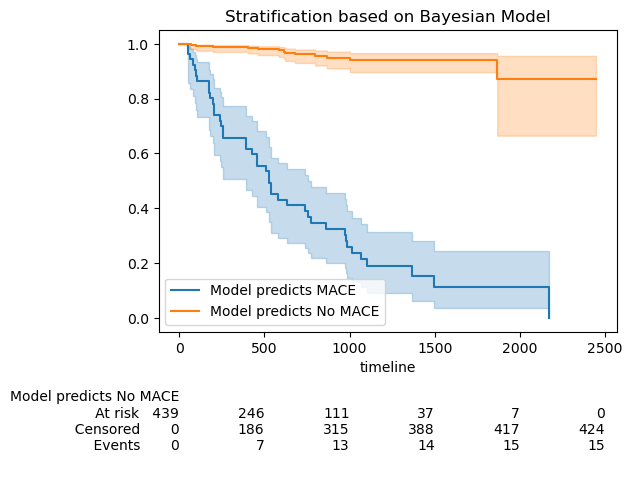

In [6]:
ax = plt.subplot(1, 1, 1)

kmf = KaplanMeierFitter()
kmf.fit(durations=test_data["Time"][m], event_observed=test_data["Status"][m], label="Model predicts MACE")
kmf.plot_survival_function(ax=ax)

kmf.fit(durations=test_data["Time"][~m], event_observed=test_data["Status"][~m], label="Model predicts No MACE")
kmf.plot_survival_function(ax=ax, at_risk_counts = True)
plt.title("Stratification based on Bayesian Model")
plt.show()